# lib we used

pip install \
   pandas matplotlib numpy \
   nltk seaborn sklearn gensim pyldavis \
   wordcloud textblob spacy textstat

In [1]:
#讀入我們會用到的套件
import pandas as pd
import datetime
import jieba
from datetime import datetime
import plotly.graph_objs as go
import plotly.offline as py
py.init_notebook_mode(connected=True) #為了能在本地端調用
import plotly.tools as tls
import plotly.figure_factory as ff
from wordcloud import WordCloud
from collections import Counter
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import swifter
import numpy as np
import itertools
from scipy.sparse import csr_matrix
# libraries
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

In [2]:
# path = '/Users/Dennis/Downloads/community_team_meeting.xlsx'
path = '/Users/Dennis/Downloads/forums.xlsx'

df = pd.read_excel(path)
# df = df.head(1000)
df.head(3)

,Unnamed: 0,user_name,text_time,text
0,1.0,**anevins**,"6:42 AM, September 30th, 2018",On another note
1,2.0,**anevins**,"6:42 AM, September 30th, 2018","When you help users and they say ""maybe someon..."
2,3.0,**tokyobiyori**,"6:47 AM, September 30th, 2018",lol


# Stats
word frequency analysis,
sentence length analysis,
average word length analysis,

In [4]:
from sklearn.feature_extraction.text import CountVectorizer
from nltk.corpus import stopwords
# Code Snippet for Creating LDA visualization
from wordcloud import WordCloud, STOPWORDS
import numpy as np
import nltk
from nltk.corpus import stopwords
import gensim
from nltk.stem import WordNetLemmatizer,PorterStemmer
from nltk.tokenize import word_tokenize
import pyLDAvis
# Visualize the topics
from pyLDAvis import sklearn as sklearn_lda
import pyLDAvis.gensim
from textblob import TextBlob
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import en_core_web_sm
from spacy import displacy
from textstat import flesch_reading_ease



def train_lda_objects(text , topic_num , stop):
#     nltk.download('stopwords')    
    
    
    def _preprocess_text(text):
        
        corpus=[]
        stem=PorterStemmer()
        lem=WordNetLemmatizer()
        for news in text:
            words=[w for w in word_tokenize(news) if (w not in stop)]

            words=[lem.lemmatize(w) for w in words if len(w)>2]

            corpus.append(words)
        return corpus
    
    corpus=_preprocess_text(text)
    
    dic=gensim.corpora.Dictionary(corpus)
    bow_corpus = [dic.doc2bow(doc) for doc in corpus]
    
    lda_model =  gensim.models.LdaMulticore(bow_corpus, 
                                   num_topics = topic_num , 
                                   id2word = dic,                                    
                                   passes = 10,
                                   workers = 2)
    
    return lda_model, bow_corpus, dic

def plot_lda_vis(lda_model, bow_corpus, dic):
    pyLDAvis.enable_notebook()
    vis = pyLDAvis.gensim.prepare(lda_model, bow_corpus, dic)
    pyLDAvis.show(vis)
    return vis




class NLP_Eng_Assistant:
    """
    @method
    
    1. show% : NLP EDA assistant 
    
    2. update% : adjust attr in this class
    
    3. ml% : machine learning algorithm
    """
    
    def __init__(self , df , text , stopwords):
        """
        Input:
            df(DataFrame) : data

            text(str): text feature name
                
            stopwords(set) : stopwords for clean text 
        Example:
            (df , 'text')
        
        """
        self.df = df.copy()
        self.text = text
        
        #Text series
        self.content  = self.df[self.text]
        
        new= df[text].str.split()
        new = new.values.tolist()
        self.corpus=[word for i in new for word in i]
        self.nlp = en_core_web_sm.load()
        self.stopwords = stopwords.words('english')
        self.words_cooc_matrix = None
#         self.stopwords = set(stopwords.words('english'))


    
    def show_each_text_length_dist(self):
        self.content.str.len().hist()
        plt.title('The number of characters present in each sentence')
        plt.show()
    
    def show_each_text_used_word_dist(self):
        
        self.df[self.text].str.split().\
        map(lambda x: len(x)).\
        hist()
        plt.title('The number of words appearing in each news headline.')
        plt.show()
    
    def show_average_word_length_in_each_sentence(self): 
        print(' Stopwords are the words that are most commonly used in any language such as “the”,” a”,” an” etc. As these words are probably small in length these words may have caused the above graph to be left-skewed.')
        self.df[self.text].str.split().\
           apply(lambda x : [len(i) for i in x]). \
           map(lambda x: np.mean(x)).hist()
        plt.title('The average word length in each sentence.')
        plt.show()
    
    def show_top_stopwords_bar_plot(self):
        text = self.df[self.text]
        stop= self.stopwords

        
        #Store it into our corpus
        corpus  = self.corpus 
        from collections import defaultdict
        dic=defaultdict(int)
        for word in corpus:
            if word in stop:
                dic[word]+=1
        
        top=sorted(dic.items(), key=lambda x:x[1],reverse=True)[:10] 
        x,y=zip(*top)
        plt.bar(x,y)
        plt.title('Top_stopwords_bar_plot')
        plt.show()
        
    def show_word_freq_except_to_stopwords(self , first_num):
        """
        Input:
            
            first_num(int): How many first common words you want
        """
        counter=Counter(self.corpus)
        stop=self.stopwords
        most=counter.most_common()
        x, y= [], []
        for word,count in most[:first_num]:
            if (word not in stop):
                x.append(word)
                y.append(count)
        plt.title('Word Frequency in our text ')
        sns.barplot(x=y,y=x)
        plt.show()
        
    def show_top_ngram(self, n=None , first_num = 10):
        """
        Input:
            n(int) : N-gram params
            first_num(int) : How many first common words you want
        """
        text = self.text
        df = self.df
        
        corpus = self.corpus
        vec = CountVectorizer(ngram_range=(n, n)).fit(corpus)
        bag_of_words = vec.transform(df[text])
        sum_words = bag_of_words.sum(axis=0) 
        words_freq = [(word, sum_words[0, idx]) 
                      for word, idx in vec.vocabulary_.items()]
        words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
        
        top_n_bigrams= words_freq[:first_num]
        x,y=map(list,zip(*top_n_bigrams))
        sns.barplot(x=y,y=x)
        freq_n_gram = set(sum([x.split() for x in pd.DataFrame(top_n_bigrams)[0]],[]))
        return list(freq_n_gram)
    

    def ml_lda_script(self , topic_num , show_lda_vis = False):
        """
        LDA modeling
        """
        text = self.content
        print('Start LDA modeling...')
        lda_model, bow_corpus, dic = train_lda_objects(text , topic_num , self.stopwords)
        word_dict = {};
        for i in range(topic_num):
            #先列出每個主題的前20個關鍵詞
            words = lda_model.show_topic(i, topn = 20);
            word_dict['Topic # ' + '{:02d}'.format(i+1)] = [i[0] for i in words];
       
        display( pd.DataFrame(word_dict))
        
        if show_lda_vis:
            print('Dashboard printing...')
            plot_lda_vis(lda_model, bow_corpus, dic)
            
 

    def show_wordcloud(self ,max_words = 20 , max_font_size=  30):
        """
        Input
        
            max_words(int): Indicates the maximum number of words to be displayed.
            max_font_size(int): maximum font size.
        """
        stopwords = self.stopwords
        wordcloud = WordCloud(
            background_color='white',
            stopwords=stopwords,
            max_words= max_words,
            max_font_size=30,
            scale=3,
            random_state=1)
        
        data = self.corpus
        wordcloud=wordcloud.generate(str(data))
        fig = plt.figure(1, figsize=(12, 12))
        plt.axis('off')
        plt.imshow(wordcloud)
        plt.show()
        
    def update_stop_words(self , add_stop_word):
        """
        add_stop_word(str):The word to add into stop words dict
        """
        self.stopwords.update(add_stop_word)
        
    def ml_sentiment_analysis(self , sentence):
        """
        polarity: is a floating-point number that lies in the range of [-1,1] 
        where 1 means positive statement and -1 means a negative statement.
        
        subjectivity: refers to how someone’s judgment is shaped by personal opinions and feelings. 
        Subjectivity is represented as a floating-point value which lies in the range of [0,1].
        """
        return TextBlob(sentence).sentiment
    
    def ml_sentiment_overall(self):
        def polarity(text):
            return TextBlob(text).sentiment.polarity
        df = self.df
        text = self.text
        
        df['polarity_score']=df[text].\
           apply(lambda x : polarity(x))
        df['polarity_score'].hist()
        plt.title('sentiment distribution')
        self.df = df
    def ml_sentiment_classify_category(self):
        
        try:
            
            df = self.df

            def sentiment(x):
                if x<0:
                    return 'neg'
                elif x==0:
                    return 'neu'
                else:
                    return 'pos'

            df['polarity']= df['polarity_score'].\
               map(lambda x: sentiment(x))

            plt.bar(df.polarity.value_counts().index,
                    df.polarity.value_counts())
            plt.title('sentiment analysis')
            plt.show()
            display(df.polarity.value_counts(normalize = True).to_frame())
            self.df = df
        except:
            print('Please exeucuate ml_overall_sentiment first!')
            print('The example code is tool.ml_overall_sentiment()')
        
    def ml_sentiment_vader_estimation(self):
        """
        The next library we are going to discuss is VADER. Vader works better in detecting negative sentiment. 
        It is very useful in the case of social media text sentiment analysis.
        """
        sid = SentimentIntensityAnalyzer()
        def get_vader_score(sent):
            # Polarity score returns dictionary
            ss = sid.polarity_scores(sent)
            #return ss
            return np.argmax(list(ss.values())[:-1])
        
        df = self.df
        text  = self.text
        df['vader_polarity']= df[text].\
            map(lambda x: get_vader_score(x))
        polarity = df['vader_polarity'].replace({0:'neg',1:'neu',2:'pos'})
        plt.title('Vader sentiment analysis')
        plt.bar(polarity.value_counts().index,
                polarity.value_counts())
    
    def ml_NER_in_most_common(self):
        """
        show what NER most common in our text
        
        """
        def ner(text):
            doc=self.nlp(text)
            return [X.label_ for X in doc.ents]
        
        
        ent=self.content.\
            apply(lambda x : ner(x))
        ent=[x for sub in ent for x in sub]
        counter=Counter(ent)
        count=counter.most_common()


        x,y=map(list,zip(*count))
        sns.barplot(x=y,y=x)
        plt.title('Most common NER in our text')
        plt.show()

    def ml_NER_in_single_sentence(self ,sentence):
        """
        exe NER technique
        """


        doc= self.nlp(sentence)
        [(x.text,x.label_) for x in doc.ents]

        displacy.render(doc, style='ent')

        
    def ml_NER_words_with_single_ent(self , ent  = "GPE"):
        """
        visualize the most common tokens per entity. 
        """
        observe = ent
        def ner(text,ent="GPE"):
            doc=self.nlp(text)
            return [X.text for X in doc.ents if X.label_ == ent]
        
        ent = self.content.apply(lambda x: ner(x , ent = ent))
        ent =[i for x in ent for i in x]
        counter=Counter(ent)
        x,y=map(list,zip(*counter.most_common(10)))
        sns.barplot(y,x)
        plt.title('The most common tokens in ' +observe)
        
    def ml_POS_tagging(self,sentence):
        """
        exe POS
        """
        doc = self.nlp(sentence)
        displacy.render(doc, style='dep', jupyter=True, options={'distance': 90})
        
    def ml_POS_overall(self):
        """
        explore our text attr by POS
        
        """
        def pos(text):
            pos=nltk.pos_tag(word_tokenize(text))
            pos=list(map(list,zip(*pos)))[1]
            return pos
        tags = self.content.apply(lambda x : pos(x))
        tags=[x for l in tags for x in l]
        counter=Counter(tags)
        x,y=list(map(list,zip(*counter.most_common(7))))
        sns.barplot(x=y,y=x)
        plt.title('Explore our text attr by POS')
        plt.show()
        
    def ml_POS_words_with_single_pos(self ,observe_tag):
        def get_adjs(text):
            adj=[]
            pos=nltk.pos_tag(word_tokenize(text))
            for word,tag in pos:
                if tag== observe_tag:
                    adj.append(word)
            return adj
        words= self.content.apply(lambda x : get_adjs(x))
        words=[x for l in words for x in l]
        counter=Counter(words)
        x,y=list(map(list,zip(*counter.most_common(7))))
        sns.barplot(x=y,y=x)
        plt.show()
        
    def show_what_POS_in_lib(self):
        info =  """
        Noun (NN)- Joseph, London, table, cat, teacher, pen, city
Verb (VB)- read, speak, ml, eat, play, live, walk, have, like, are, is
Adjective(JJ)- beautiful, happy, sad, young, fun, three
Adverb(RB)- slowly, quietly, very, always, never, too, well, tomorrow
Preposition (IN)- at, on, in, from, with, near, between, about, under
Conjunction (CC)- and, or, but, because, so, yet, unless, since, if
Pronoun(PRP)- I, you, we, they, he, she, it, me, us, them, him, her, this
Interjection (INT)- Ouch! Wow! Great! Help! Oh! Hey! Hi!
        
        """
        print(info)


    def show_easily_readable(self):
        """ readable test """
        self.content.\
       apply(lambda x : flesch_reading_ease(x)).hist()


        
    def get_under_score_text(self , score):
        """Too low score means the complex words being used in these sentence"""
        reading =  self.content.\
       apply(lambda x : flesch_reading_ease(x))
        x=[i for i in range(len(reading)) if reading[i]<score]
#         displacy(self.content.iloc[x].head())
        return self.content.iloc[x]

    def run_nlp_analysis_script(self):
        self.show_average_word_length_in_each_sentence()
        self.show_each_text_length_dist()
        self.show_each_text_used_word_dist()
        self.show_easily_readable()
        self.show_top_ngram(2 , 10)
        self.show_top_stopwords_bar_plot()
        self.show_word_freq_except_to_stopwords(40)
        self.show_wordcloud()
        
        self.ml_lda_script(4)
        self.ml_NER_in_most_common()
        self.ml_POS_overall()
        self.ml_sentiment_overall()
        self.ml_sentiment_classify_category()
        self.ml_sentiment_vader_estimation()
        
    def show_word_stream_change(self , compare_word):
        """
        Compare word along with text
        
        """
        def calculate_word_freq(sentence , target):
            sentence = sentence.split(' ')
            count = 0
            for txt in sentence:
                if txt.lower() == target:
                    count += 1
            return count
#         compare_word = []
        temp_word =pd.DataFrame()
        for words in compare_word:
            temp_word[words] = self.content.apply(lambda x:calculate_word_freq(x , words))
        temp_word.plot()
      
    def create_co_occurence_matrix(self , allowed_words):
        """
        Generate word co-occurence matrix
        
        """
        
        documents = self.content.apply(lambda x:x.split())
        
        def create_co_occurences_matrix(allowed_words, documents):
            """
            Input:
                allowed_words(List): The words you want to observe 
                documents(2D-List):Collection of split word per sentence 

                Example:
                    allowed_words = [want , a]
                    documents = [[I , want , a , pizza] , [I,  want , a , apple]]
            Output:
                value_matrix : 詞與詞的共同出現頻率
            """
            word_to_id = dict(zip(allowed_words, range(len(allowed_words))))
            documents_as_ids = [np.sort([word_to_id[w] for w in doc if w in word_to_id]).astype('uint32') for doc in documents]
            row_ind, col_ind = zip(*itertools.chain(*[[(i, w) for w in doc] for i, doc in enumerate(documents_as_ids)]))
            data = np.ones(len(row_ind), dtype='uint32')  # use unsigned int for better memory utilization
            max_word_id = max(itertools.chain(*documents_as_ids)) + 1
            docs_words_matrix = csr_matrix((data, (row_ind, col_ind)), shape=(len(documents_as_ids), max_word_id))  # efficient arithmetic operations with CSR * CSR
            words_cooc_matrix = docs_words_matrix.T * docs_words_matrix  # multiplying docs_words_matrix with its transpose matrix would generate the co-occurences matrix
            words_cooc_matrix.setdiag(0)
        #     print(f"words_cooc_matrix:\n{words_cooc_matrix.todense()}")
            return words_cooc_matrix.todense(), word_to_id 
        words_cooc_matrix , word_to_id =  create_co_occurences_matrix(allowed_words , documents)
        words_cooc_matrix =  pd.DataFrame(words_cooc_matrix)
        words_cooc_matrix.index = allowed_words
        words_cooc_matrix.columns = allowed_words
        self.words_cooc_matrix = words_cooc_matrix
        return words_cooc_matrix

    def show_co_occurence_structure(self,heat = True,  graph = True):
        if heat:
            plt.figure(figsize = (16,9))
            sns.heatmap(self.words_cooc_matrix, cmap="YlGnBu")
        
        if graph:
            plt.figure(figsize = (16,10))
            #從matrix轉成圖
            G =  nx.from_pandas_adjacency(self.words_cooc_matrix)
            # Graph with Custom nodes:
            nx.draw(G, with_labels=True, node_size=100, node_color="skyblue", node_shape="s", alpha=0.5, linewidths=40)
            plt.show()
  
 

print('-' *20)
"""
test
"""        

tool = NLP_Eng_Assistant(df , 'text' , stopwords)


--------------------


TypeError: 'float' object is not iterable

 Stopwords are the words that are most commonly used in any language such as “the”,” a”,” an” etc. As these words are probably small in length these words may have caused the above graph to be left-skewed.


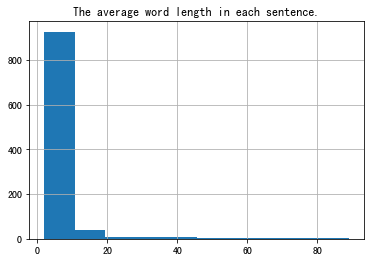

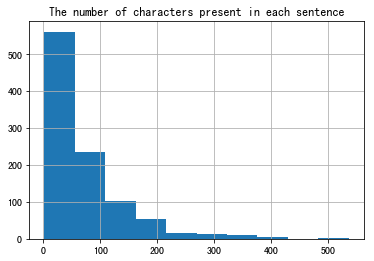

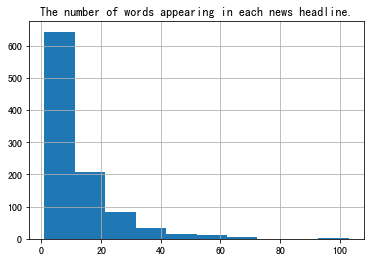

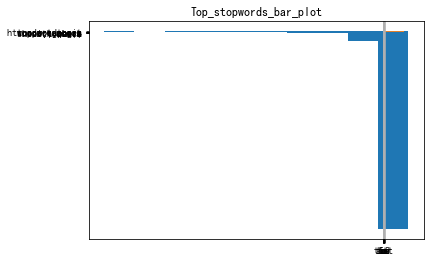

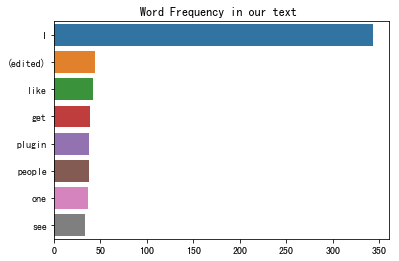

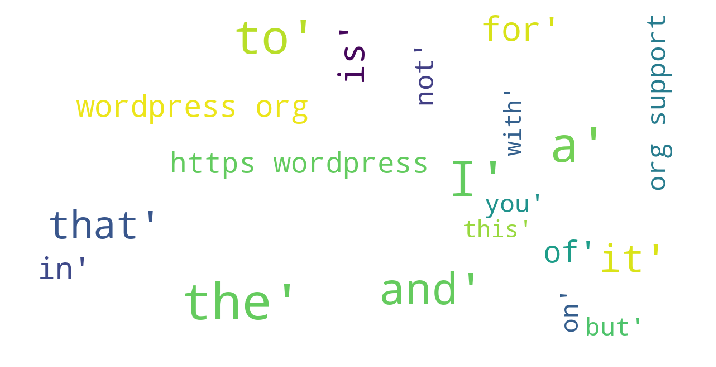

Start LDA modeling...


,Topic # 01,Topic # 02,Topic # 03,Topic # 04
0,http,review,n't,http
1,n't,theme,think,n't
2,...,got,'re,plugin
3,edited,There,know,review
4,That,page,'ve,one
5,need,But,like,time
6,coffee,Thanks,would,...
7,people,'ve,one,You
8,may,could,get,edited
9,back,time,people,theme


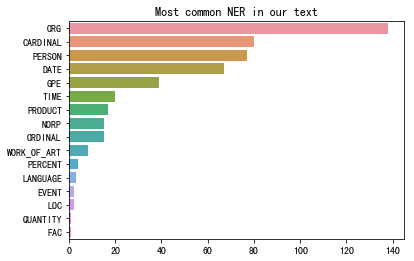

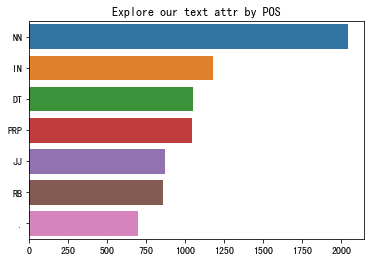

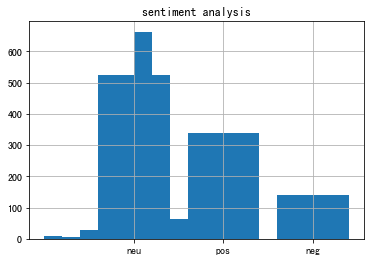

,polarity
neu,0.523
pos,0.338
neg,0.139


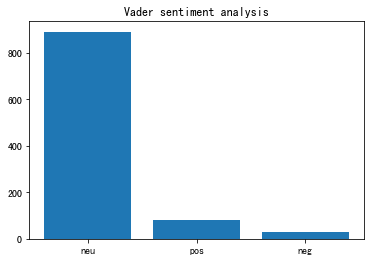

In [11]:
tool.run_nlp_analysis_script()

# Text preprocessing

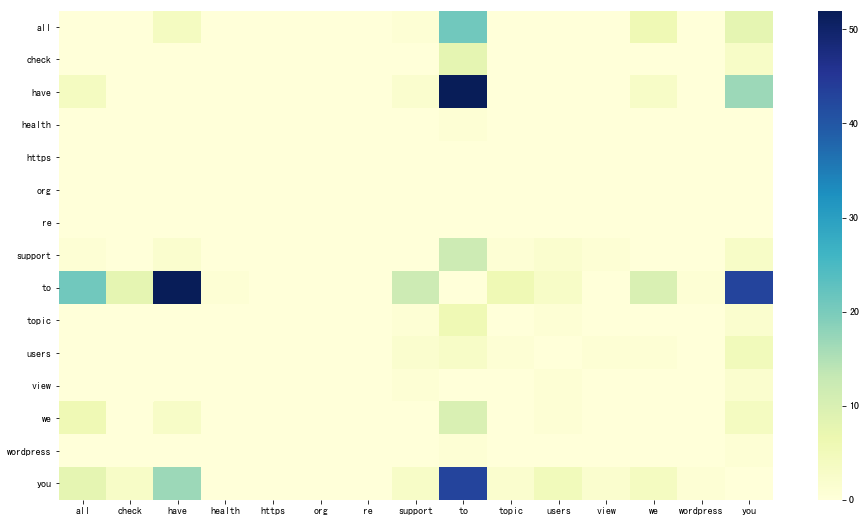

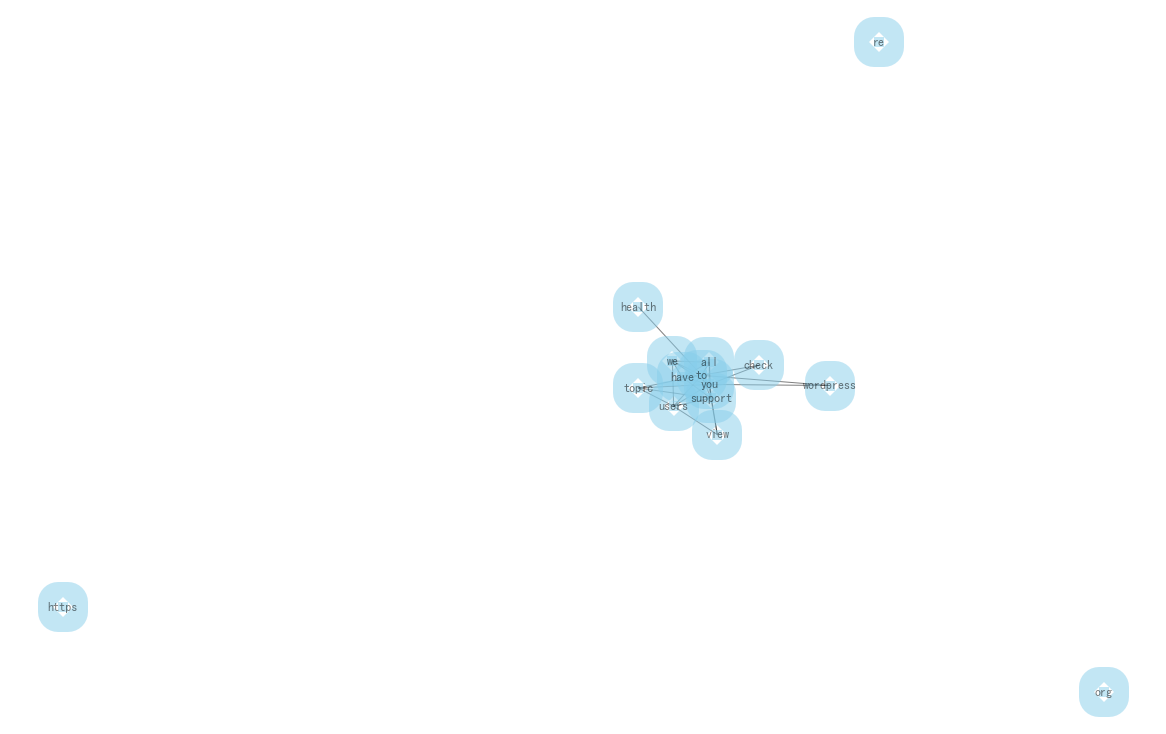

In [375]:

# stopwords = set(stopwords.words('english'))

tool.create_co_occurence_matrix(['all',
 'check',
 'have',
 'health',
 'https',
 'org',
 're',
 'support',
 'to',
 'topic',
 'users',
 'view',
 'we',
 'wordpress',
 'you'])
tool.show_co_occurence_structure()

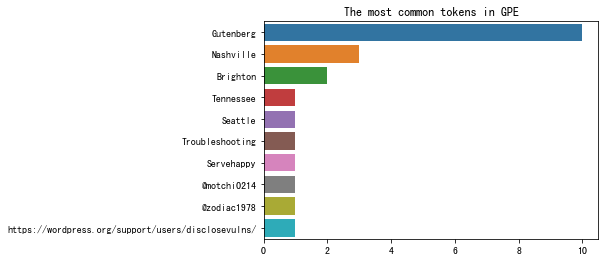

In [324]:
# tool.ml_POS_words_with_single_pos('NN')
tool.ml_NER_words_with_single_ent('')
# tool.show_what_POS_in_lib()

In [313]:
stopwords

<WordListCorpusReader in '/Users/Dennis/nltk_data/corpora/stopwords'>

In [294]:
import jieba

jieba.load_userdict('/Users/Dennis/Python與商業分析/R_text_mining/my_dict.txt')

def chinese_word_cut(mytext):
    try:
        word = " ".join(jieba.cut(mytext))
    except:
        word = ''
    return word

def get_custom_stopwords(stop_words_file):
    with open(stop_words_file,'r' , encoding='gbk' , newline= '') as f:
        stopwords = f.read()
    stopwords_list = stopwords.split('\n')
    custom_stopwords_list = [i.replace('\r','') for i in stopwords_list]
    return custom_stopwords_list




def get_features(sent):
    """抽取1-gram 以及 2-gram特徵"""
    unigrams = list(sent)
    bigrams = [sent[i:i+2] for i in range(len(sent)-1)]

    return unigrams + bigrams

stop_words_file = '/Users/Dennis/data_science/NLP /Term project/哈工大停用词表.txt'


#切分出斷詞這個欄位
df['cut_comment'] = df.content.apply(chinese_word_cut)

stopwords = get_custom_stopwords(stop_words_file)

from hanziconv import HanziConv


new_stop_words = []
for word in stopwords:
    new_stop_words.append(HanziConv.toTraditional(word))
stopwords =  set(new_stop_words)

 Stopwords are the words that are most commonly used in any language such as “the”,” a”,” an” etc. As these words are probably small in length these words may have caused the above graph to be left-skewed.


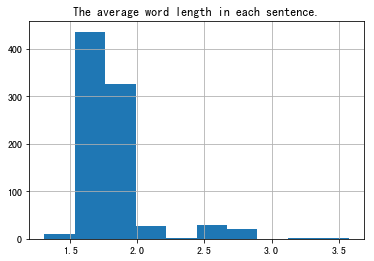

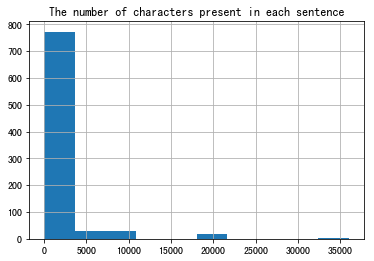

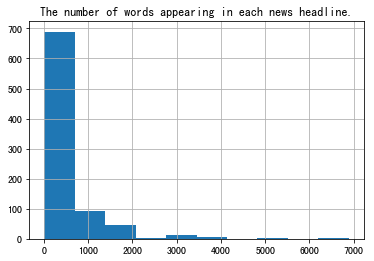

TypeError: 'WordListCorpusReader' object is not iterable

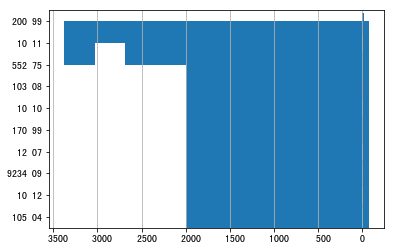